In [512]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly_express as pe
import plotly.io as pio

In [513]:
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')
print(f'Importovány nové datasety: \n 1. train tvar: {df_train.shape} \n 2. test tvar: {df_test.shape}')

X_test_Id = df_test[["Id"]]


Importovány nové datasety: 
 1. train tvar: (1460, 81) 
 2. test tvar: (1459, 80)


In [514]:
df_test
df_test.index += len(df_train) # run only ONCE !!! asi by bylo lepší přeindexování u obou datasetů 

In [515]:
df_join = pd.concat([df_train,df_test])
print(f' Spojený dataset tvar: {df_join.shape}')

 Spojený dataset tvar: (2919, 81)


In [516]:
df_join.select_dtypes(include=['object'])

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,RM,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,...,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,WD,Normal
2915,RM,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,...,CarPort,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
2916,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
2917,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,NaN,NaN,NaN,NaN,Y,NaN,MnPrv,Shed,WD,Normal


In [517]:
dummy_list = ['LotShape',
'LandContour',
'LotConfig',
'Condition1',
'Condition2',
'BldgType',
'HouseStyle',
'Foundation',
'Heating',
'Electrical',
'Functional',
'GarageType',
'SaleType',
'SaleCondition','MSSubClass','MSZoning',
'Exterior1st','Exterior2nd','RoofMatl','RoofStyle']

quality_list = ['KitchenQual','GarageQual', 'GarageCond','ExterQual','ExterCond','HeatingQC','BsmtQual','BsmtCond']
replace_list = ['Utilities','LandSlope']



drop_list = [
'Street',
'Alley',
'Neighborhood',
'MasVnrType',
'MasVnrArea',
'BsmtExposure',
'BsmtFinType1',
'BsmtFinSF1',
'BsmtFinType2',
'BsmtFinSF2',
'BsmtUnfSF',
'FireplaceQu',
'GarageFinish',
'PavedDrive',
'PoolQC',
'Fence',
'MiscFeature',
'MiscVal',
'MoSold']

fill_na_mean = []
fil_na_zero = ['LotFrontage','BsmtFullBath', 'BsmtHalfBath','TotalBsmtSF','GarageCars','GarageArea','GarageYrBlt']
drop_na = []

In [518]:
df_join_preproc = df_join.copy()

In [519]:
def preproc_drop(data,columns):
    data = data.drop(columns = columns, axis = 1)
    return data

In [520]:
df_join_preproc = df_join_preproc.drop(columns = drop_list, axis = 1)

In [521]:
df_join_preproc = pd.get_dummies(df_join_preproc, columns = dummy_list, dummy_na=True, drop_first=True)

In [522]:
mapping = {'Ex' : 4, 'Gd' : 3, 'TA' :2 , 'Fa' : 1, 'Po' : 0}

for i in quality_list:
    df_join_preproc[f'{i}'] = df_join_preproc[f'{i}'].replace(mapping)

In [523]:
df_join_preproc[f'Utilities'] = df_join_preproc[f'Utilities'].replace({'AllPub':3, 'NoSewr':2, 'NoSeWa':1,'ELO':0})
df_join_preproc[f'LandSlope'] = df_join_preproc[f'LandSlope'].replace({'Gtl':2, 'Mod':1, 'Sev':0})
df_join_preproc[f'CentralAir'] = df_join_preproc[f'CentralAir'].replace({'Y' : 1, 'N' : 0})

In [524]:
df_join_preproc = df_join_preproc.fillna(int(0))

In [525]:
df_join_preproc.select_dtypes(include=['object'])


""
0
1
2
3
4
...
2914
2915
2916
2917


In [526]:
training_columns = list(df_join_preproc.columns)

In [527]:
df_train_processed = df_join_preproc.iloc[:1460,:]
df_test_processed = df_join_preproc.iloc[1460:,:]

In [528]:
df_train_processed.isna().sum().sort_values(ascending=False)

Id                      0
SaleType_nan            0
SaleCondition_Alloca    0
SaleCondition_Family    0
SaleCondition_Normal    0
                       ..
Condition2_PosN         0
Condition2_RRAe         0
Condition2_RRAn         0
Condition2_RRNn         0
RoofStyle_nan           0
Length: 196, dtype: int64

In [529]:
df_test_processed.isna().sum().sort_values(ascending=False)

Id                      0
SaleType_nan            0
SaleCondition_Alloca    0
SaleCondition_Family    0
SaleCondition_Normal    0
                       ..
Condition2_PosN         0
Condition2_RRAe         0
Condition2_RRAn         0
Condition2_RRNn         0
RoofStyle_nan           0
Length: 196, dtype: int64

<AxesSubplot: >

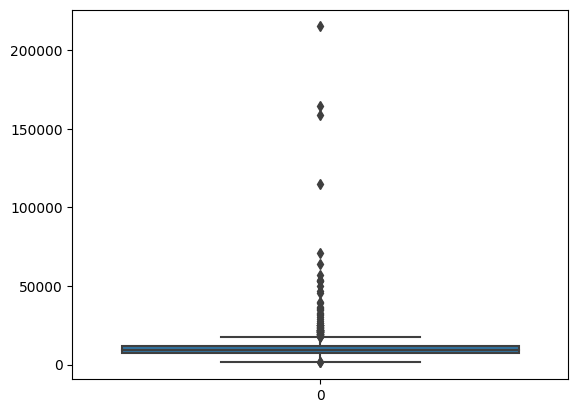

In [530]:
sns.boxplot(data = df_train_processed['LotArea'])

In [531]:
def turkey_func(data):
    training_columns = list(data.columns)
    for i in training_columns:
        Q1 = df_join_preproc[f'{i}'].quantile(0.25)
        Q3 = df_join_preproc[f'{i}'].quantile(0.75)
        IQR = Q3 - Q1
        print(i)

        data[f'{i}'] = data[f'{i}'].mask(data[f'{i}'] < (Q1-1.5*IQR), data[f'{i}'].mean())
        data[f'{i}'] = data[f'{i}'].mask(data[f'{i}'] > (Q3+1.5*IQR), data[f'{i}'].mean())
    return data

In [532]:
df_train_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 196 entries, Id to RoofStyle_nan
dtypes: float64(14), int64(28), uint8(154)
memory usage: 698.8 KB


In [533]:
# df_train_processed = turkey_func(df_train_processed)
# df_test_processed= turkey_func(df_test_processed)

<AxesSubplot: >

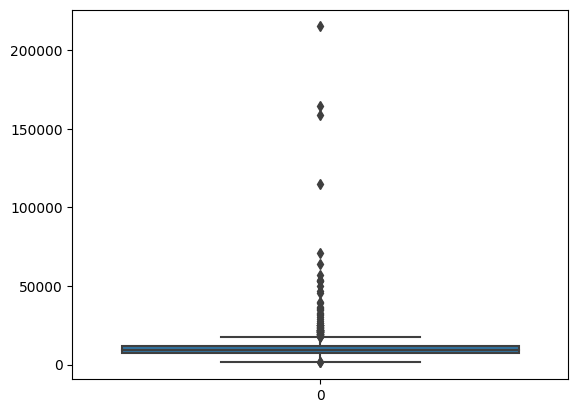

In [534]:
sns.boxplot(data = df_train_processed['LotArea'])

In [535]:
df_train_fin = df_train_processed.drop('Id', axis = 1)
df_test_fin = df_test_processed.drop('Id', axis = 1)

In [536]:
from sklearn.model_selection import train_test_split

X = df_train_fin.drop('SalePrice', axis = 1)
y = df_train_fin['SalePrice']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.7, random_state=0)

In [537]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor


model = LinearRegression()

In [538]:
model.fit(X_train,y_train)

LinearRegression()

In [539]:
y_pred_val = model.predict(X_val)

In [540]:
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(y_val, y_pred_val, squared=False)
print(rmse)

accu_train = model.score(X_train, y_train)
print(accu_train)

accu_test = model.score(X_val, y_val)
print(accu_test)

44205.691248351075
0.9366226341608029
0.7050641626130687


In [548]:
X_test = df_test_fin.drop('SalePrice', axis = 1)

In [549]:
y_pred = model.predict(X_test)

In [550]:

submission001 = X_test_Id.copy()
submission001['SalePrice'] = y_pred

df_test_predict = df_test_fin.copy()

df_test_predict['SalePrice'] = y_pred

In [551]:
submission001.to_csv('lin_reg_submission_sk_linreg.csv', index = False)

<AxesSubplot: xlabel='LotArea', ylabel='SalePrice'>

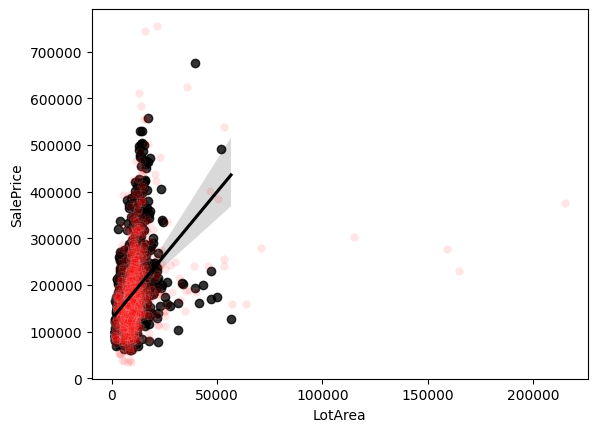

In [552]:
sns.regplot(data = df_test_predict, x = 'LotArea', y = 'SalePrice', color = 'black')
sns.scatterplot(data = df_train, x = 'LotArea', y = 'SalePrice', alpha = 0.1, color = 'r')

33853.51249831066
1.0
0.8270268691818292


<AxesSubplot: xlabel='LotArea', ylabel='SalePrice'>

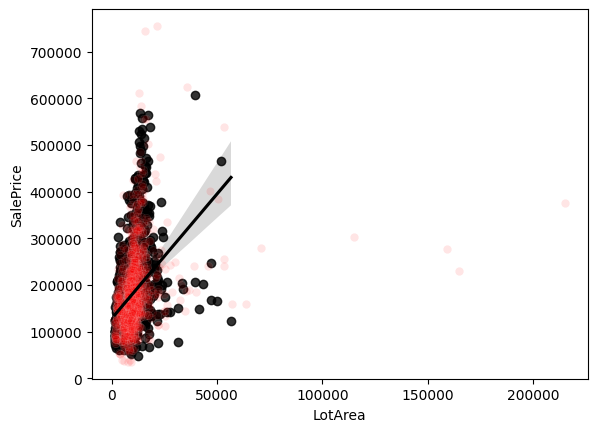

In [558]:
model = GradientBoostingRegressor(n_estimators = 10000)
model.fit(X_train,y_train)
y_pred_val = model.predict(X_val)


from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(y_val, y_pred_val, squared=False)
print(rmse)

accu_train = model.score(X_train, y_train)
print(accu_train)

accu_test = model.score(X_val, y_val)
print(accu_test)


X_test = df_test_fin.drop('SalePrice', axis = 1)
y_pred = model.predict(X_test)

submission002 = X_test_Id.copy()
submission002['SalePrice'] = y_pred

df_test_predict = df_test_fin.copy()

df_test_predict['SalePrice'] = y_pred

sns.regplot(data = df_test_predict, x = 'LotArea', y = 'SalePrice', color = 'black')
sns.scatterplot(data = df_train, x = 'LotArea', y = 'SalePrice', alpha = 0.1, color = 'r')

In [559]:
submission002.to_csv('lin_reg_submission_sk_gradientboost.csv', index = False)